<a href="https://colab.research.google.com/github/anthony-rio/Portfolio/blob/main/Food_101_Resnet_18_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Libraries

In [2]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms

from torchvision.models import resnet18

# Import matplotlib for visualization
import matplotlib.pyplot as plt

Load Data

In [3]:
data_transform = transforms.Compose([
    transforms.Resize([128, 128]),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

train_data = datasets.Food101(
    root="data", # where to download data to?
    split="train", # get training data
    download=True, # download data if it doesn't exist on disk
    transform=data_transform, # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

test_data = datasets.Food101(
    root="data", # where to download data to?
    split="test", # get training data
    download=True, # download data if it doesn't exist on disk
    transform=data_transform, # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)



100%|██████████| 4996278331/4996278331 [00:54<00:00, 91471904.13it/s] 


Extracting data/food-101.tar.gz to data


In [4]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[ 2.1119,  2.1290,  2.1462,  ..., -0.5596, -0.4568, -0.5253],
          [ 2.1290,  2.1290,  2.1290,  ..., -0.5938, -0.4054, -0.3883],
          [ 2.1290,  2.1462,  2.1462,  ..., -0.5082, -0.3369, -0.3027],
          ...,
          [ 0.5536,  0.6049,  0.6221,  ...,  0.1426,  0.1426,  0.1597],
          [ 0.5022,  0.5022,  0.5193,  ...,  0.2282,  0.2624,  0.2967],
          [ 0.4337,  0.3994,  0.4337,  ...,  0.3138,  0.4166,  0.4508]],
 
         [[ 2.2185,  2.2360,  2.2185,  ..., -1.4755, -1.3529, -1.4405],
          [ 2.2360,  2.2360,  2.2010,  ..., -1.5105, -1.3179, -1.3529],
          [ 2.2360,  2.2535,  2.2185,  ..., -1.4230, -1.2829, -1.3179],
          ...,
          [-0.7052, -0.6527, -0.6352,  ..., -0.0399, -0.0049,  0.1001],
          [-0.7052, -0.7227, -0.6877,  ...,  0.0651,  0.1527,  0.2577],
          [-0.7577, -0.7927, -0.7577,  ...,  0.1702,  0.3277,  0.4328]],
 
         [[ 2.4483,  2.4657,  2.4657,  ..., -1.4733, -1.3861, -1.5430],
          [ 2.4657,  2.4657,

In [5]:
#image shape
image.shape

torch.Size([3, 128, 128])

In [6]:
#how many images in each data set?
len(train_data), len(test_data)

(75750, 25250)

In [7]:
#class names
class_names = train_data.classes
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

Image shape: torch.Size([3, 128, 128])


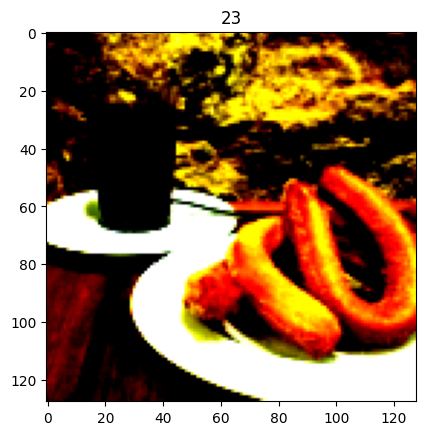

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[4]
print(f"Image shape: {image.shape}")
plt.imshow(image.permute(1, 2, 0))
plt.title(label);

In [9]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7a9f652fa3e0>, <torch.utils.data.dataloader.DataLoader object at 0x7a9f652fac20>)
Length of train dataloader: 2368 batches of 32
Length of test dataloader: 790 batches of 32


In [10]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


In [11]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)


In [12]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Resnet 18

In [13]:
from torch import nn

class ResidualBlock(nn.Module):

    def __init__(self, in_channels, out_channels, downsample=False, identity_downsample=None, stride=1):
        '''
        Initialize a basic residual block.
        Depending on whether downsample is True, there are two types of basic blocks in Resnet 18,
        one to downsample the input and the other maintains the same size.
        You can use Pytorch's functions.

        Input and output shapes of each layer:
        1) conv1 (3*3 kernel, no bias): (batch_size, in_channels, H, W) -> (batch_size, out_channels, H, W) if downsample=False
           conv1 (3*3 kernel, no bias): (batch_size, in_channels, H, W) -> (batch_size, out_channels, H//2, W//2) if downsample=True, with stride of 2
        2) conv2 (3*3 kernel, no bias): (batch_size, out_channels, H, W) -> (batch_size, out_channels, H, W)
        3) conv3 (optional) if downsample=True (1*1 kernel, no bias): (batch_size, in_channels, H, W) -> (batch_size, out_channels, H//2, W//2) with stride of 2
        '''
        super(ResidualBlock, self).__init__()
        ################# Your Implementations #################################
        if downsample == True:
          # self.conv1 = nn.Conv2d(input_channels, conv_hidden_channels, kernel_size=kernel_size, stride=stride, padding=padding)
          self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1)
        else:
          self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride = 1, padding=1)

        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride = 1, padding=1)

        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv3 = None
        if downsample == True:
          self.conv3 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=2)

        self.bn3 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        ################# End of your Implementations ##########################

    def forward(self, x):
        """
        Forward pass of the basic residual block.
        The input tensor 'x' should pass through the following layers:
        1) conv1: (batch_size, in_channels, H, W) -> (batch_size, out_channels, H, W)
           conv1: (batch_size, in_channels, H, W) -> (batch_size, out_channels, H//2, W//2) if downsample=True
        2) Apply batch normalization after conv1.
        3) Apply relu activation.
        4) conv2: (batch_size, out_channels, H, W) -> (batch_size, out_channels, H, W)
        5) Apply batch normalization after conv2.
        6) (Optional) if downsample=True, conv3: (batch_size, in_channels, H, W) -> (batch_size, out_channels, H//2, W//2) on the original input
        7) (Optional) if downsample=True, apply batch normalization after conv3.
        8) Add the residual value to the original input
        9) Apply relu activation in the end.
        """
        ################# Your Implementations #################################
        # TODO: Implement the forward pass of the basic residual block.
        original = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        if self.conv3 is not None:
          original = self.conv3(original)
          original = self.bn3(original)
        x = x + original
        x = self.relu(x)
        ################# End of your Implementations ##########################
        return x

In [14]:
class ResNet18(nn.Module):

    def __init__(self, num_classes=100):
        super(ResNet18, self).__init__()
        self.in_channels = 64
        # Initial convolution
        self.conv1 = nn.Conv2d(3,
                               64,
                               kernel_size=7,
                               stride=2,
                               padding=3,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # define four residual sequential layers, each layer consists of two residual blocks
        # if the layer has the same input and output channels, do not apply downsampling
        # if the layer has doubled output channels from the input, apply downsample on the first residual blocks with also doubled output channels
        # the second residual block would always have the same input and output channels without downsample
        # layer1: input channel: 64, output channel: 64
        # layer2: input channel: 64, output channel: 128
        # layer3: input channel: 128, output channel: 256
        # layer4: input channel: 256, output channel: 512
        # use nn.Sequential to concatenate the two blocks
        ################# Your Implementations #################################
        self.layer1 = nn.Sequential(ResidualBlock(64, 64), ResidualBlock(64, 64))
        self.layer2 = nn.Sequential(ResidualBlock(64, 128, downsample=True), ResidualBlock(128, 128))
        self.layer3 = nn.Sequential(ResidualBlock(128, 256, downsample=True), ResidualBlock(256, 256))
        self.layer4 =  nn.Sequential(ResidualBlock(256, 512, downsample=True), ResidualBlock(512, 512))
        ################# End of your Implementations ##########################
        # Average Pooling
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        # Fully connected layer
        self.fc = nn.Linear(512, num_classes)

    def __make_layer(self, in_channels, out_channels, stride):

      identity_downsample = None
      if stride != 1:
          identity_downsample = self.identity_downsample(in_channels, out_channels)

      return nn.Sequential(
          ResidualBlock(in_channels, out_channels, identity_downsample=identity_downsample, stride=stride),
          ResidualBlock(out_channels, out_channels)
      )

    def identity_downsample(self, in_channels, out_channels):

      return nn.Sequential(
          nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1),
          nn.BatchNorm2d(out_channels)
      )

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x


# Create a ResNet-18 model
model = ResNet18(num_classes=101)

Model Architecture

In [15]:
model

ResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

Training Loop

In [16]:
def train(model, train_loader, val_loader, optimizer, criterion, device,
          num_epochs):
    """
    Train the MLP classifier on the training set and evaluate it on the validation set every epoch.

    Args:
        model (MLP): MLP classifier to train.
        train_loader (torch.utils.data.DataLoader): Data loader for the training set.
        val_loader (torch.utils.data.DataLoader): Data loader for the validation set.
        optimizer (torch.optim.Optimizer): Optimizer to use for training.
        criterion (callable): Loss function to use for training.
        device (torch.device): Device to use for training.
        num_epochs (int): Number of epochs to train the model.
    """
    # Place model on device
    model = model.to(device)

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        # Use tqdm to display a progress bar during training
        with tqdm(total=len(train_loader),
                  desc=f'Epoch {epoch + 1}/{num_epochs}',
                  position=0,
                  leave=True) as pbar:
            for inputs, labels in train_loader:
                # Move inputs and labels to device
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero out gradients
                optimizer.zero_grad()

                # Compute the logits and loss
                logits = model(inputs)
                loss = criterion(logits, labels)

                # Backpropagate the loss
                loss.backward()

                # Update the weights
                optimizer.step()

                # Update the progress bar
                pbar.update(1)
                pbar.set_postfix(loss=loss.item())

        # Evaluate the model on the validation set
        avg_loss, accuracy = evaluate(model, val_loader, criterion, device)
        print(
            f'Validation set: Average loss = {avg_loss:.4f}, Accuracy = {accuracy:.4f}'
        )


Set seed, define model, optimzer, criterion

In [17]:
torch.manual_seed(0)

# Define the model, optimizer, and criterion (loss_fn)
model = ResNet18(num_classes=len(train_data.classes))

# Let's use the built-in optimizer for a full version of SGD optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# For loss function, your implementation and the built-in loss function should
# be almost identical.
criterion = nn.CrossEntropyLoss()

In [19]:
from tqdm import tqdm

Train model on only a couple of epochs to make sure it is working

In [20]:
train(model,
      train_dataloader,
      test_dataloader,
      optimizer,
      criterion,
      device,
      num_epochs=2)

Epoch 1/2: 100%|██████████| 2368/2368 [08:49<00:00,  4.47it/s, loss=4.54]


Validation set: Average loss = 3.6782, Accuracy = 0.1432


Epoch 2/2: 100%|██████████| 2368/2368 [08:01<00:00,  4.92it/s, loss=4.43]


Validation set: Average loss = 3.0574, Accuracy = 0.2520
